In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import open3d as o3d

from utils import *

In [53]:
recording_dir = "/home/yunzhu/Documents/project_phystouch/phystouch/data_recording/data"
recording_dir = "C:/Users/lucas/Desktop/UPC/MIT/tactile2object/intrinsics_extrinsics/data/20210719_1/"

cameras = ["020122061233", "821312060044", "020122061651", "821312062243"]

intrinsics = Intrinsics(recording_dir)
extrinsics = Extrinsics(recording_dir)
rgbds = RGBD(recording_dir, recording="20210719_175830")
stitched_pcd = Stitching_pcds(intrinsics, extrinsics, rgbds, cameras)
apriltags = AprilTags(recording_dir, intrinsics, extrinsics, recording="20210719_175830", cameras=cameras)
stitched_pcd = Stitching_pcds(intrinsics, extrinsics, rgbds, cameras)

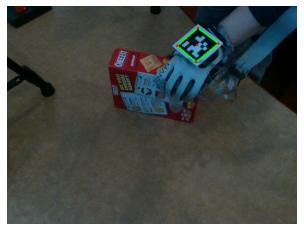

In [54]:
apriltags.image(idx="000450", camera="821312062243")

# Save 4 Images + AprilTag detection

In [55]:
save_dir = os.path.join(apriltags.recording_dir, "imgs")

if not os.path.exists(save_dir):
    os.makedirs(save_dir)
    
for camera in cameras:
    camera_dir = os.path.join(save_dir, camera)
    
    if not os.path.exists(camera_dir):
        os.makedirs(camera_dir)
    
    for i in range(0, 1758):
        idx = str(i).zfill(6)

        img = apriltags.image(idx=idx, camera=camera, show=False)
        
        filename = os.path.join(camera_dir, f"img_{idx}.png")
        cv2.imwrite(filename, cv2.cvtColor(img, cv2.COLOR_RGB2BGR))

# Visible cameras

In [56]:
from collections import defaultdict

visible_cameras = defaultdict(list)

n= 1758


for i in range(0, n):
    idx = str(i).zfill(6)

    n_visibles = 0
    
    for camera in cameras:
        # Corner pixels
        corners_w = apriltags.corners_w(idx=idx, camera=camera)
        
        visible = 0 if corners_w is None else 1
        visible_cameras[camera].append(visible)
        
        n_visibles += visible
    
    visible_cameras['All'].append(n_visibles)
    
    

In [ ]:
import matplotlib.pyplot as plt

vis_dir = "C:/Users/lucas/Desktop/UPC/MIT/tactile2object/intrinsics_extrinsics/data/20210719_1/20210719_175830/imgs/visible_cameras/"

green = np.zeros((2,2,3))
green[:,:,1] = np.ones((2,2))

red = np.zeros((2,2,3))
red[:,:,0] = np.ones((2,2))

for i, visible in enumerate(visible_cameras['All']):
    
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    plt.axis('off')
    
    if visible:
        plt.imshow(green)
    else:
        plt.imshow(red)
    
    img_dir = os.path.join(vis_dir, f"{i}.png")
    extent = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    plt.savefig(img_dir, bbox_inches=extent)
    plt.close()

C:\Users\lucas\anaconda3\envs\manopth\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  del sys.path[0]
